# **Notebook 2: EDA**

## Objectives

* The next step in our data analysis process is Exploratory Data Analysis (EDA). This is a crucial step where you'll discover patterns, spot anomalies, test hypothesis, and check assumptions with the help of summary statistics and graphical representations.

* In the context of our problem, we are mainly interested in understanding the relationship between house attributes and the SalePrice. We'll therefore look for correlations between the variables.

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [8]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [9]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [10]:
current_dir = os.getcwd()
current_dir

'/workspaces/housing'

# Section 1

We start by plotting a correlation matrix. This will give us a visual overview of how the variables are related to each other.

First, we load the cleaned data.

In [11]:
import pandas as pd

records_df = pd.read_csv('outputs/datasets/cleaned/house_prices_records_cleaned.csv')
inherited_df = pd.read_csv('outputs/datasets/cleaned/inherited_houses_cleaned.csv')

---

Here is a recap:

In [12]:
records_df.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856       854             3           No         706          GLQ   
1      1262         0             3           Gd         978          ALQ   
2       920       866             3           Mn         486          GLQ   
3       961         0             3           No         216          ALQ   
4      1145         0             4           Av         655          GLQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        150         548          RFn         2003  ...     8450          65   
1        284         460          RFn         1976  ...     9600          80   
2        434         608          RFn         2001  ...    11250          68   
3        540         642          Unf         1998  ...     9550          60   
4        490         836          RFn         2000  ...    14260          84   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0         196           61            5            7          856       2003   
1           0            0            8            6         1262       1976   
2         162           42            5            7          920       2001   
3           0           35            5            7          756       1915   
4         350           84            5            8         1145       2000   

   YearRemodAdd  SalePrice  
0          2003     208500  
1          1976     181500  
2          2002     223500  
3          1970     140000  
4          2000     250000  

[5 rows x 22 columns]

Here we explore the data with a Profile Report from pandas. We are interested to get more familiar with the dataset, check variable distribution, missing levels (in our case there are none since we handled missing data in the earlier step) and what these variables mean in a business context. It gives an overview of the useful insights to the data. Later on, we will get into more specific details.

In [18]:
%matplotlib inline

In [7]:
from pandas_profiling import ProfileReport

profile = ProfileReport(records_df, minimal=True)
profile.to_notebook_iframe()

# Univariate Analysis

We use descriptive statistics and visualizations to understand the distribution of each variable individually.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_columns = ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 
                     'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 
                     'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']

categorical_columns = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

# For numerical variables
for col in numerical_columns:
    print(records_df[col].describe())
    plt.hist(records_df[col], bins=30)
    plt.xlabel(col)
    plt.show()

# For categorical variables
for col in categorical_columns:
    print(records_df[col].value_counts())
    records_df[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.show()


# Bivariate Analysis

Next, we analyze the relationship between each variable and the target 'SalePrice'. We use visualizations like scatter plots for numerical variables and box plots for categorical variables.

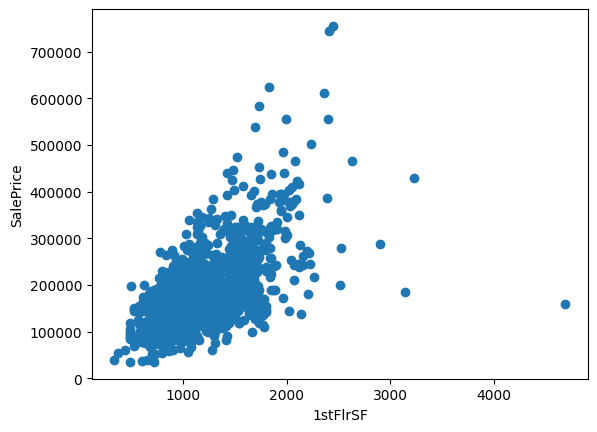

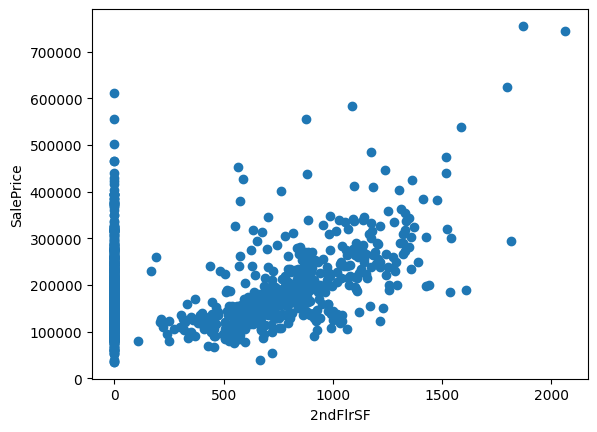

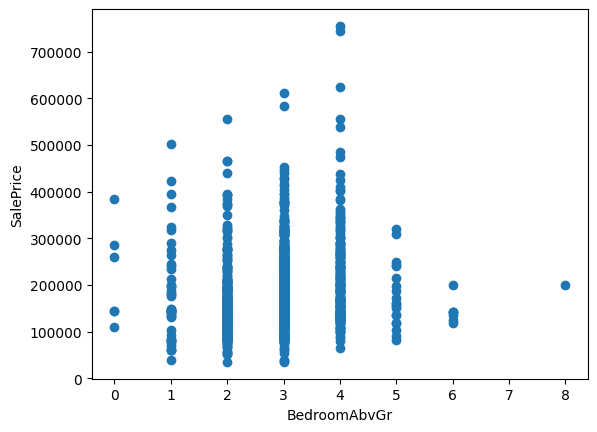

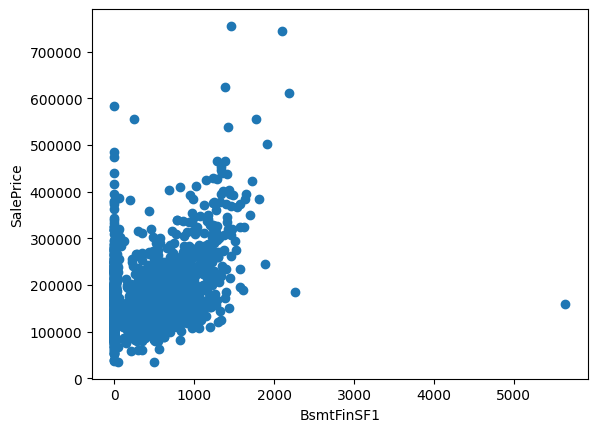

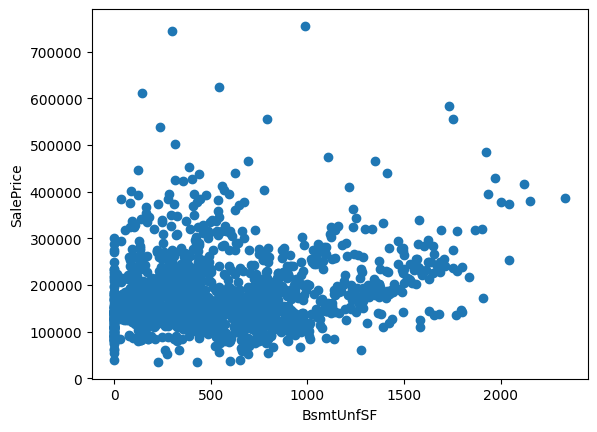

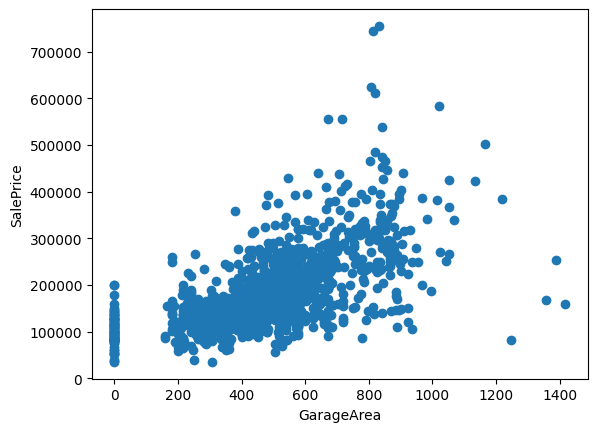

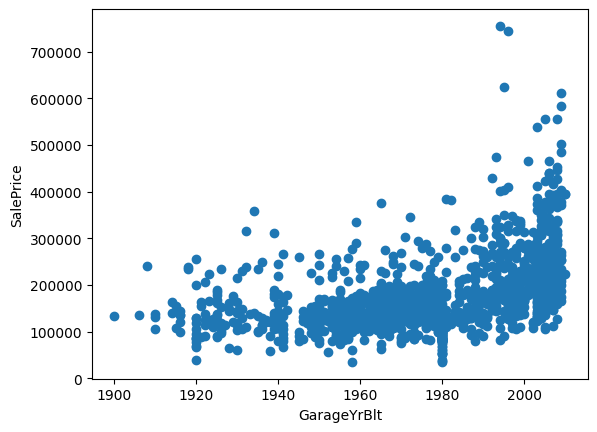

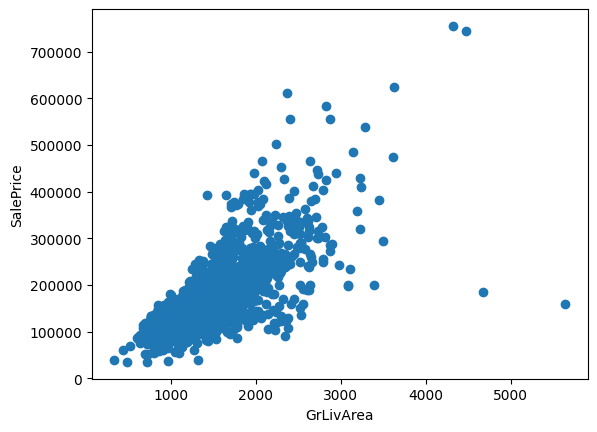

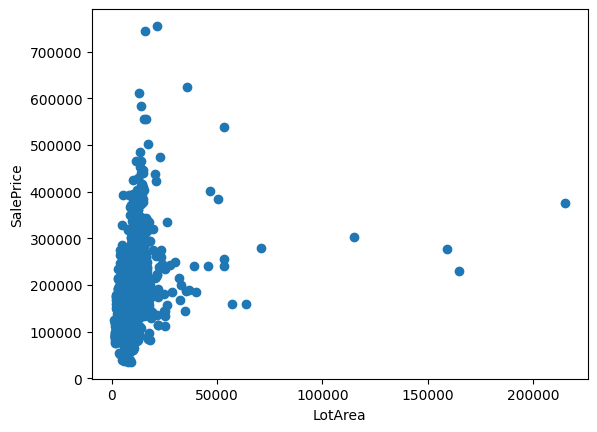

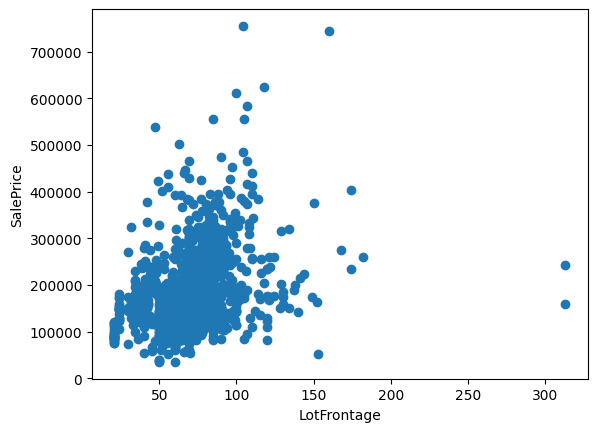

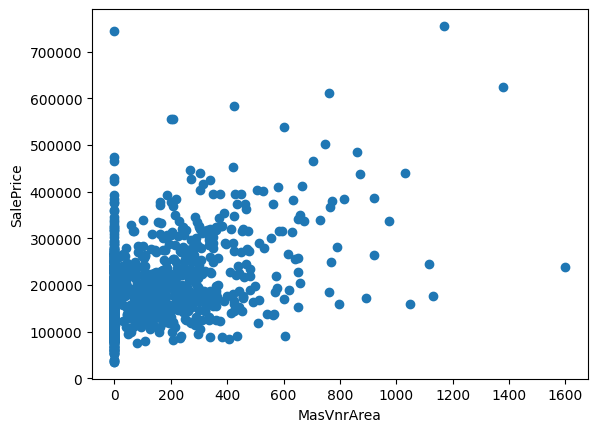

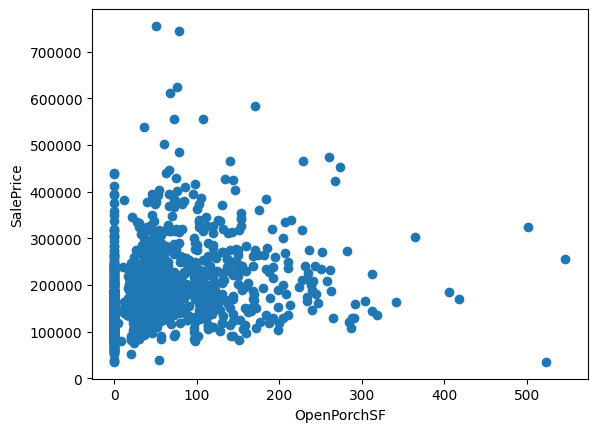

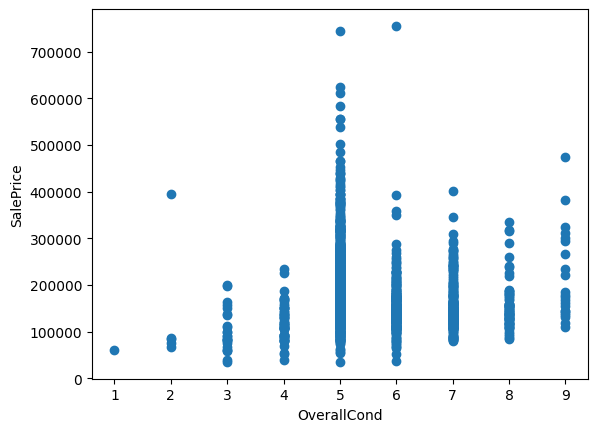

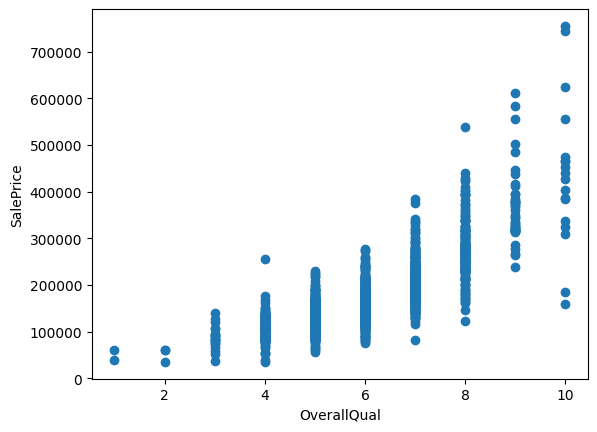

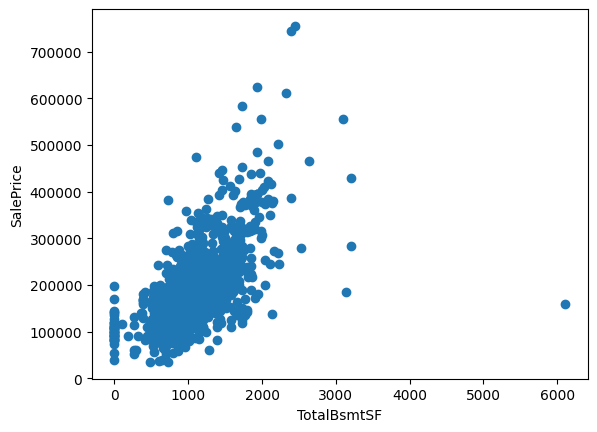

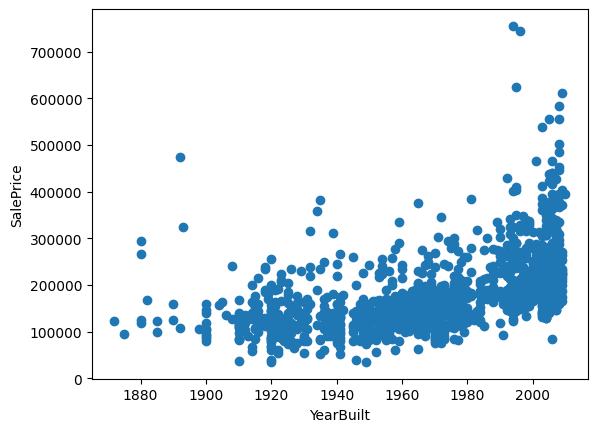

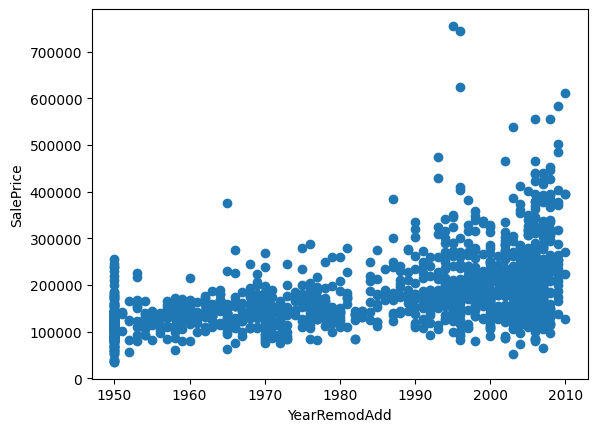

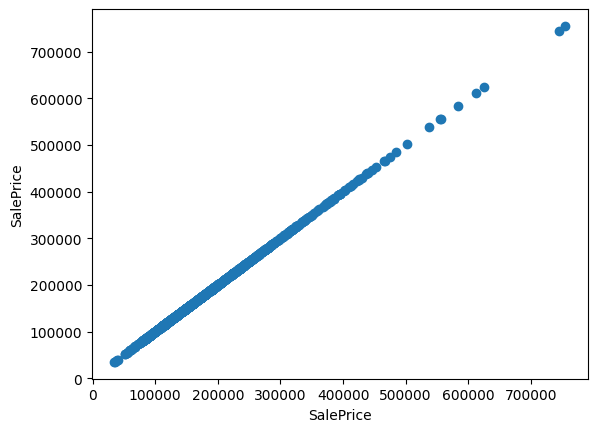

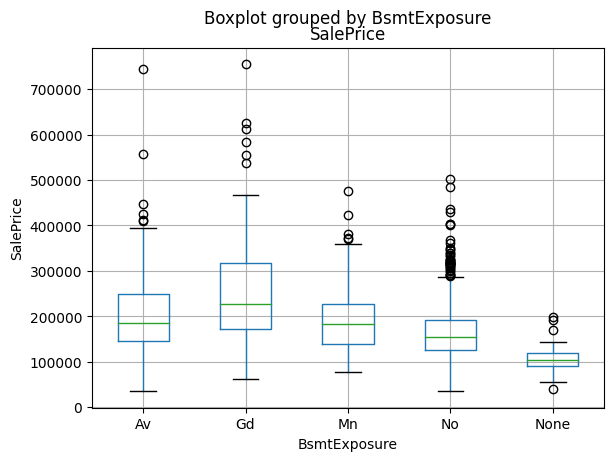

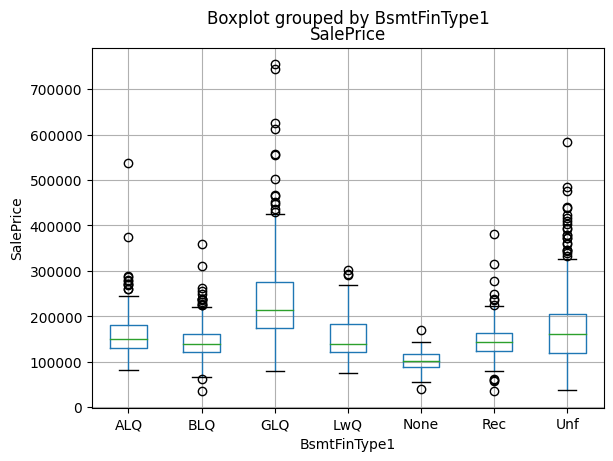

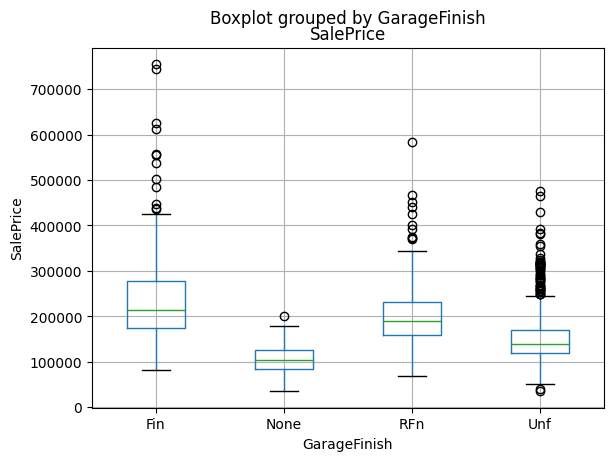

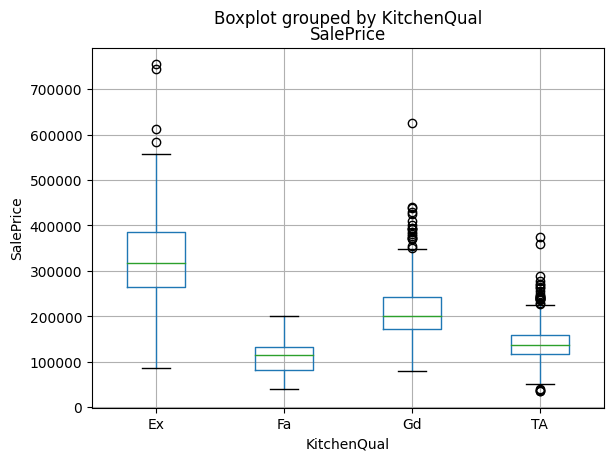

In [20]:
# For numerical variables
for col in numerical_columns:
    plt.scatter(records_df[col], records_df['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()
    
# For categorical variables
for col in categorical_columns:
    records_df.boxplot(column='SalePrice', by=col)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()


# Correlation Analysis

Now we calculate the correlation of each variable with the 'SalePrice' using both Pearson and Spearman correlations:

In [21]:
corr_pearson = records_df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman = records_df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)

print("Top 10 variables most correlated with SalePrice (Pearson):\n", corr_pearson)
print("Top 10 variables most correlated with SalePrice (Spearman):\n", corr_spearman)


Top 10 variables most correlated with SalePrice (Pearson):
 OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64
Top 10 variables most correlated with SalePrice (Spearman):
 OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
GarageYrBlt     0.563256
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64


Given the output from the correlation analyses, we might describe the correlations as follows:

For Pearson's Correlation:

- **OverallQual**: The correlation of 0.79 with SalePrice suggests a very strong positive linear relationship.
- **GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF**: These features show strong positive linear relationships with **SalePrice**, with correlation coefficients ranging from around 0.6 to 0.71.
- **YearBuilt, YearRemodAdd, MasVnrArea, GarageYrBlt**: With correlation coefficients ranging from approximately 0.47 to 0.52, these variables indicate moderate positive linear relationships with **SalePrice**.
- **BsmtFinSF1**: This shows a weak positive linear relationship with **SalePrice**, with a correlation coefficient of about 0.39.

For Spearman's Correlation:

- **OverallQual**: The correlation of 0.81 with SalePrice suggests a very strong positive monotonic relationship.
- **GrLivArea, YearBuilt, GarageArea, TotalBsmtSF, 1stFlrSF, YearRemodAdd, GarageYrBlt**: These features have strong positive monotonic relationships with **SalePrice**, with correlation coefficients ranging from around 0.57 to 0.73.
- **OpenPorchSF, LotArea**: With correlation coefficients of approximately 0.46 and 0.48, these variables indicate moderate positive monotonic relationships with SalePrice.

Fort both methods:
- **OverallQual** is the variable that has the highest positive correlation with **SalePrice** in both methods. This suggests that as the overall quality of a house increases, so does its sale price.

- **GrLivArea** is the second most correlated variable according to both methods. This indicates that the above ground living area in square feet is a significant predictor of the sale price, with larger living areas commanding higher prices.

- Variables such as **GarageArea, TotalBsmtSF, 1stFlrSF** are also highly positively correlated with **SalePrice**. This means that these features of the house also significantly contribute to its price.

- **YearBuilt** is more correlated when using Spearman's method compared to Pearson's. This might suggest a non-linear relationship between **YearBuilt** and **SalePrice**. It's reasonable to expect that newer houses would sell for more.

- **OpenPorchSF and LotArea** appear in the top 10 for Spearman correlation but not Pearson, suggesting potential non-linear relationships with **SalePrice**.

Next, we get a list of 10 distinct features that are most correlated with the SalePrice according to both correlation methods.

In [22]:
top_n = 10
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'BsmtFinSF1',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

NB: We got 12 variables because there were two variables in the top 10 for Pearson that were not in the top 10 for Spearman, and vice versa. So when we merged these two lists together, we got 12 unique variables.

Therefore we are studying at df the following variables. We will investigate if:


1. 1stFlrSF (First Floor square feet): Larger first floor areas might correlate with higher sales prices, as more living space could be desirable to buyers.

2. BsmtFinSF1 (Type 1 finished square feet): Higher finished basement square footage might lead to a higher sale price because this would offer additional usable living space.

3. GarageArea (Size of garage in square feet): Larger garages might be associated with higher sale prices as they offer more storage space or more room for vehicles.

4. GarageYrBlt (Year garage was built): More recent garages might correlate with higher sale prices, possibly due to being in better condition or having more modern features.

5. GrLivArea (Above grade (ground) living area square feet): A larger above-ground living area might be linked to higher sales prices, as buyers typically value more living space.

6. LotArea (Lot size in square feet): Larger lot sizes might be associated with higher sales prices, as they offer more outdoor space or potential for expansion.

7. MasVnrArea (Masonry veneer area in square feet): Properties with larger masonry veneer areas might fetch higher prices due to aesthetic appeal or perceived quality.

8. OpenPorchSF (Open porch area in square feet): Properties with larger open porch areas might have higher sale prices, as these can enhance the appeal of a home, particularly in warmer months.

9. OverallQual (Rates the overall material and finish of the house): Higher overall quality might be directly linked to higher sales prices, as buyers are typically willing to pay more for better-quality properties.

10. TotalBsmtSF (Total square feet of basement area): A larger basement might be associated with higher sales prices, as this offers additional living or storage space.

11. YearBuilt (Original construction date): More recently constructed houses might fetch higher prices, possibly due to being in better condition, being more energy-efficient, or containing more modern features.

12. YearRemodAdd (Remodel date): Houses that were remodeled more recently might fetch higher prices, as they may be in better condition or contain more up-to-date features.

In [23]:
vars_to_study = ['1stFlrSF', 'BsmtFinSF1', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'MasVnrArea', 'OpenPorchSF', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
vars_to_study

['1stFlrSF',
 'BsmtFinSF1',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

We use the seaborn library to plot a correlation heatmap.
This code will plot a heatmap of the correlations between all the variables in the dataset. The annot=True parameter will display the correlation coefficients on the plot, and fmt='.2f' will format these coefficients to 2 decimal places. The cmap='coolwarm' parameter sets the color map of the heatmap to 'coolwarm'.

The correlation coefficient ranges from -1 to 1. If value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

In [11]:
%matplotlib inline

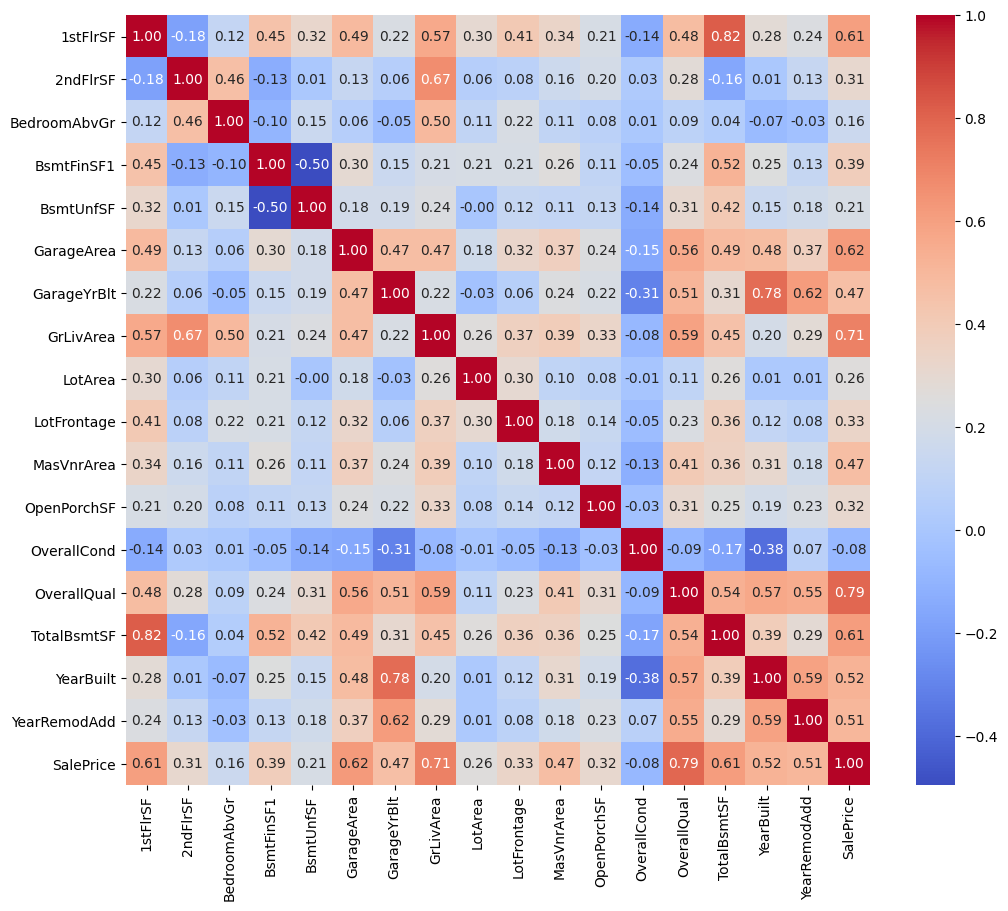

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(records_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

From the heatmap we can see e.g. that OverallQuality and SalePrice are quite highly correlated.

# Numerical Data Analysis

Next we describe the numerical data and visualize the distributions. The output table summarizes the central tendency, dispersion and shape of the dataset's distribution for each numerical variable.

In [14]:
records_df.describe()

1stFlrSF     2ndFlrSF  BedroomAbvGr   BsmtFinSF1    BsmtUnfSF  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean   1162.626712   327.994521      2.878082   443.639726   567.240411   
std     386.587738   433.576171      0.792485   456.098091   441.866955   
min     334.000000     0.000000      0.000000     0.000000     0.000000   
25%     882.000000     0.000000      2.000000     0.000000   223.000000   
50%    1087.000000     0.000000      3.000000   383.500000   477.500000   
75%    1391.250000   714.500000      3.000000   712.250000   808.000000   
max    4692.000000  2065.000000      8.000000  5644.000000  2336.000000   

        GarageArea  GarageYrBlt    GrLivArea        LotArea  LotFrontage  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137  1978.589041  1515.463699   10516.828082    69.863699   
std     213.804841    23.997022   525.480383    9981.264932    22.027677   
min       0.000000  1900.000000   334.000000    1300.000000    21.000000   
25%     334.500000  1962.000000  1129.500000    7553.500000    60.000000   
50%     480.000000  1980.000000  1464.000000    9478.500000    69.000000   
75%     576.000000  2001.000000  1776.750000   11601.500000    79.000000   
max    1418.000000  2010.000000  5642.000000  215245.000000   313.000000   

        MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.117123    46.660274     5.575342     6.099315  1057.429452   
std     180.731373    66.256028     1.112799     1.382997   438.705324   
min       0.000000     0.000000     1.000000     1.000000     0.000000   
25%       0.000000     0.000000     5.000000     5.000000   795.750000   
50%       0.000000    25.000000     5.000000     6.000000   991.500000   
75%     164.250000    68.000000     6.000000     7.000000  1298.250000   
max    1600.000000   547.000000     9.000000    10.000000  6110.000000   

         YearBuilt  YearRemodAdd      SalePrice  
count  1460.000000   1460.000000    1460.000000  
mean   1971.267808   1984.865753  180921.195890  
std      30.202904     20.645407   79442.502883  
min    1872.000000   1950.000000   34900.000000  
25%    1954.000000   1967.000000  129975.000000  
50%    1973.000000   1994.000000  163000.000000  
75%    2000.000000   2004.000000  214000.000000  
max    2010.000000   2010.000000  755000.000000

Next, we visualize the distributions of the numerical variables

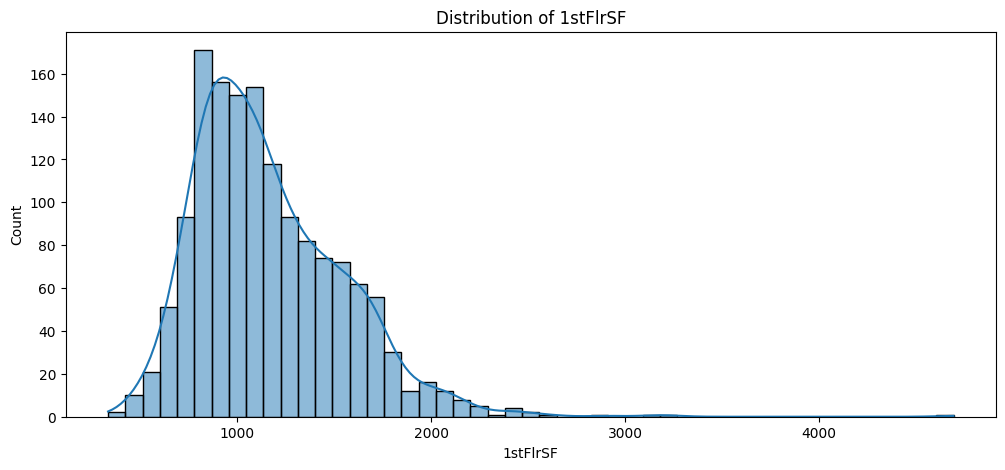

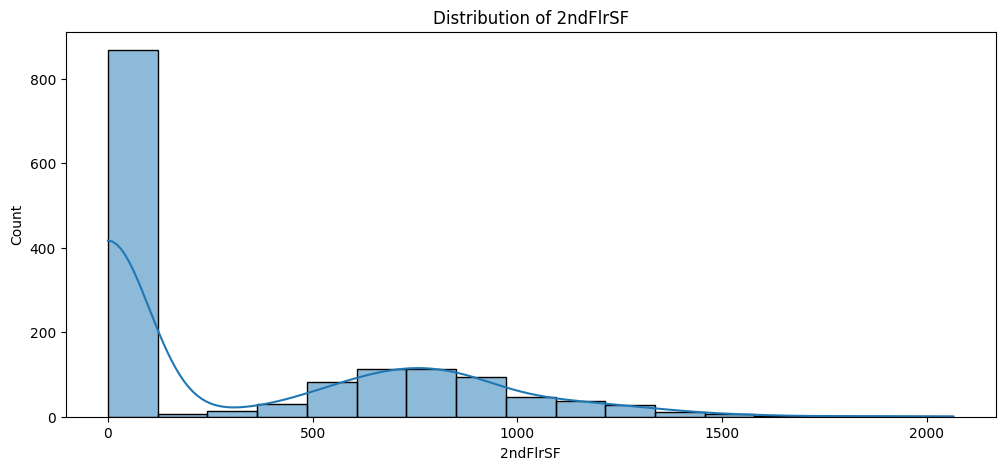

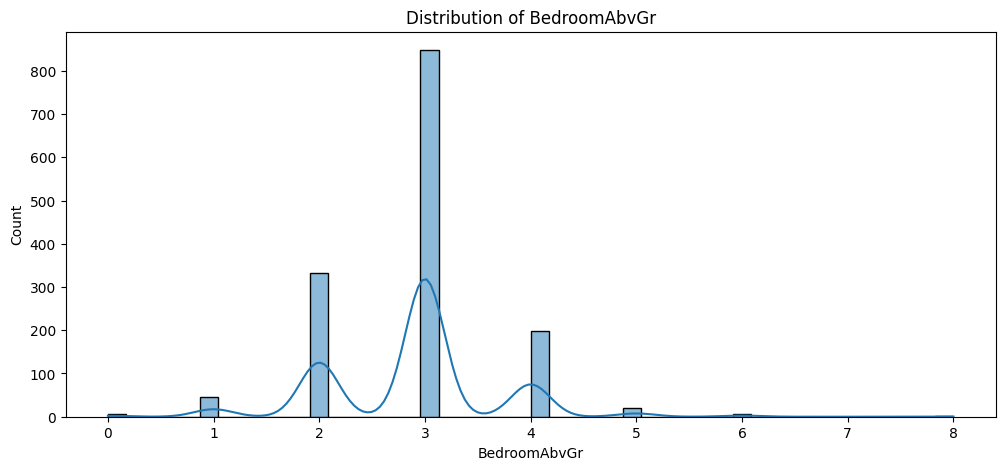

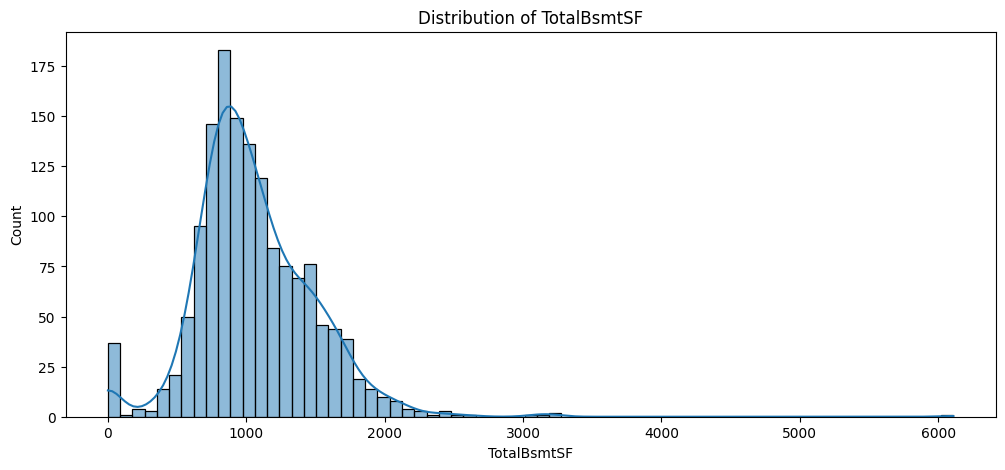

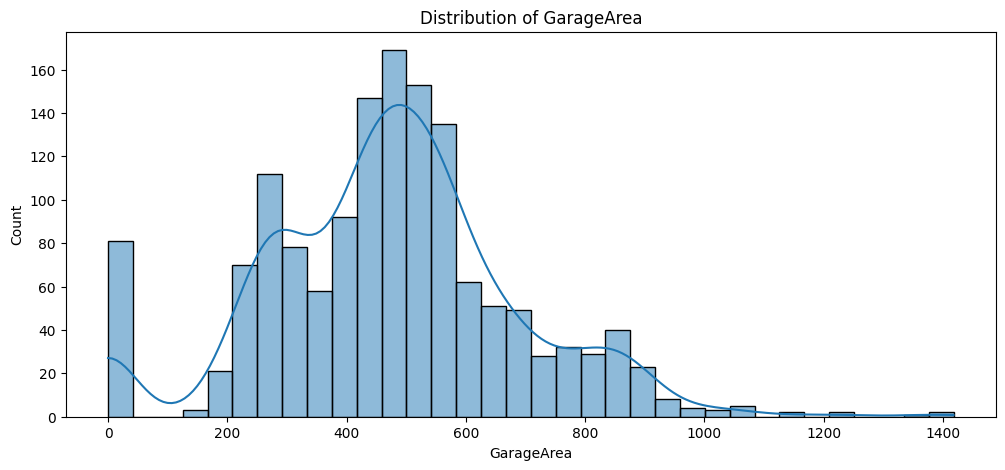

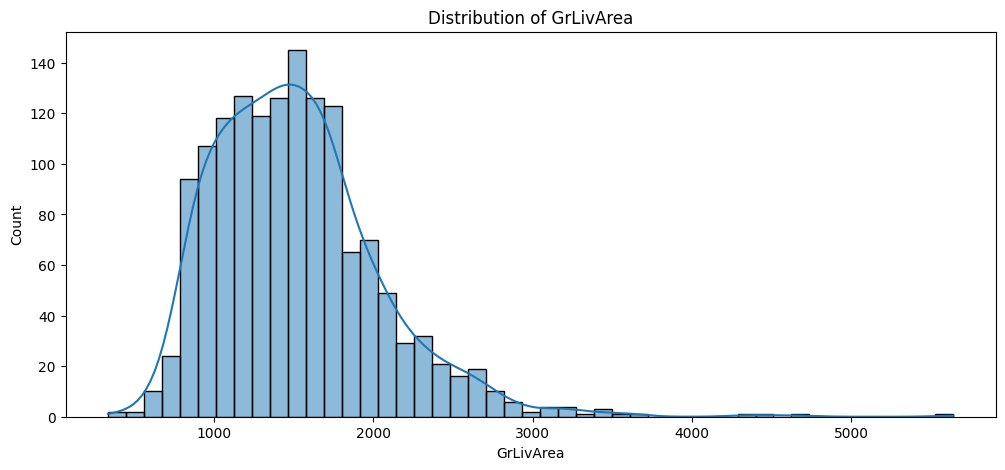

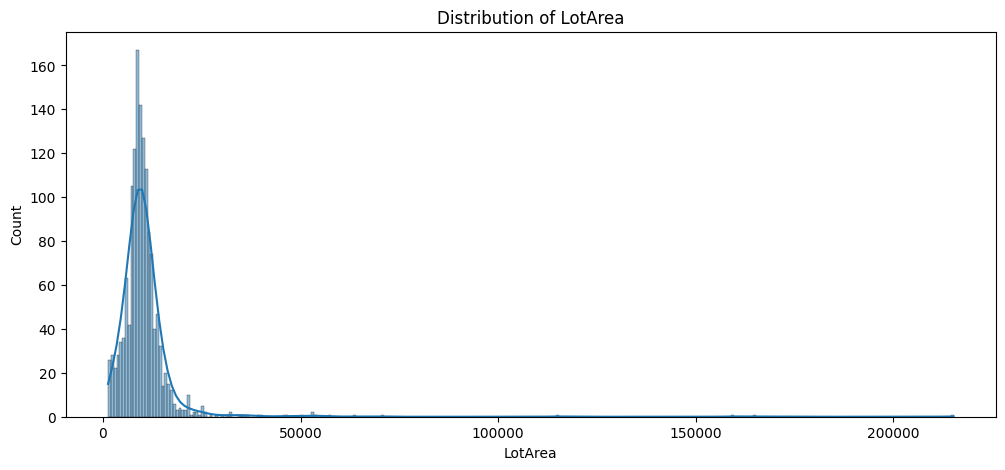

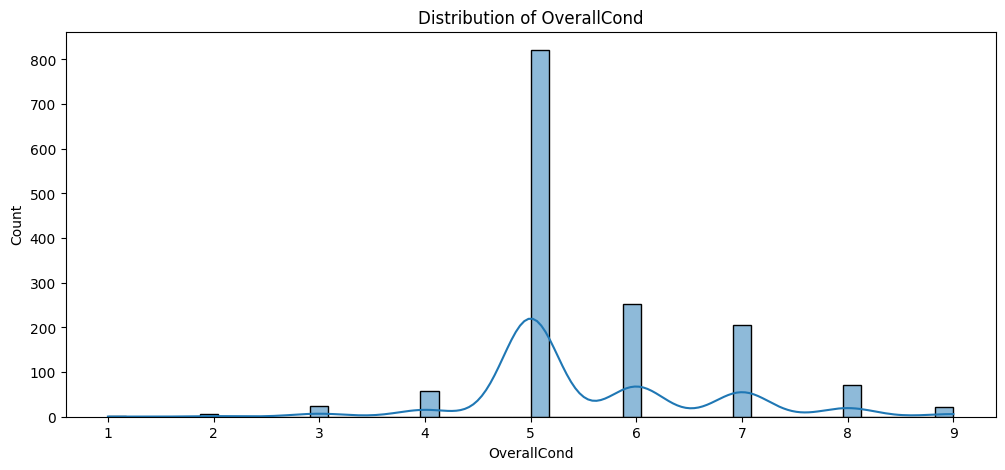

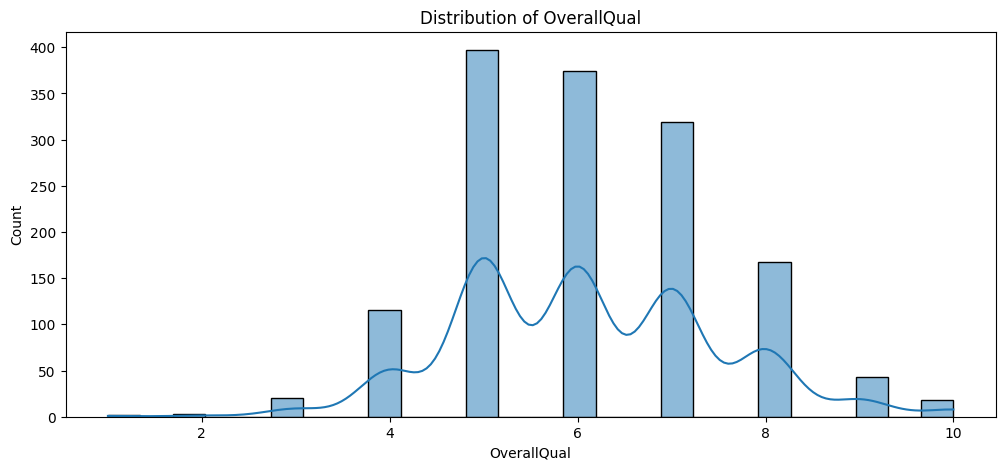

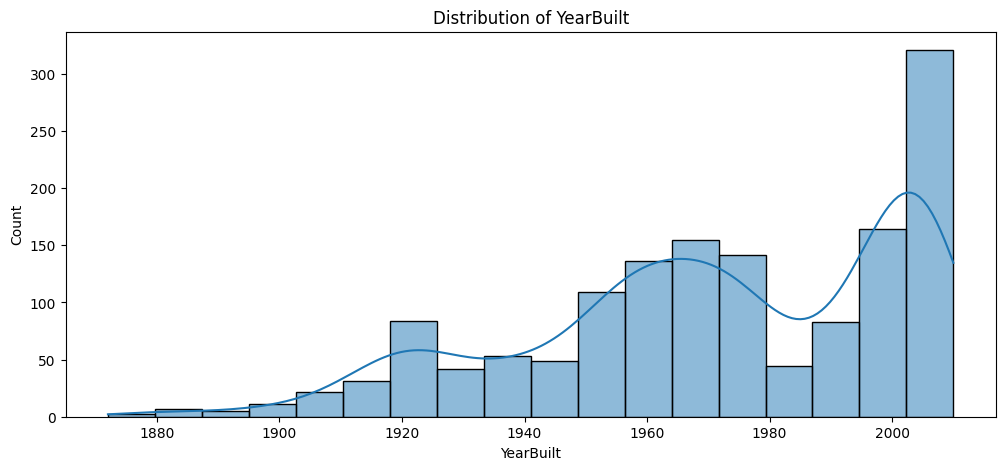

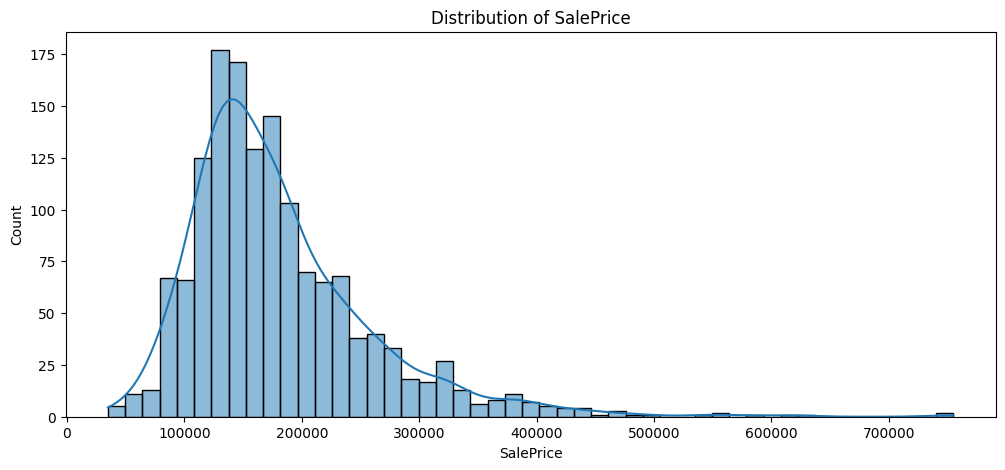

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables I'm interested in
num_vars = ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'LotArea', 'OverallCond', 'OverallQual', 'YearBuilt', 'SalePrice']

# Loop through the list and plot a histogram for each variable
for var in num_vars:
    plt.figure(figsize=(12,5))
    plt.title("Distribution of " + var)
    sns.histplot(records_df[var], kde=True)
    plt.show()


Section 2 content

In [16]:
correlations = records_df.corr()['SalePrice'].sort_values(key=abs, ascending=False)

print(correlations.head(10))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.466754
Name: SalePrice, dtype: float64


Above are the variables that have the highest correlation with 'SalePrice', below we are creating scatter plots of these variables against 'SalePrice' to visualize their relationships.

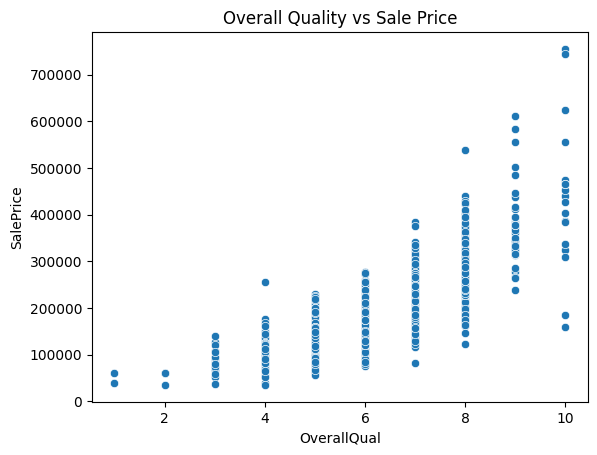

In [17]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=records_df)
plt.title("Overall Quality vs Sale Price")
plt.show()

Checking for Multicollinearity: After the scatter plots, check for multicollinearity among the variables with high correlation with 'SalePrice'. You can create a correlation matrix heatmap for these variables.

The heatmap will help you see if there are any pairs of these variables that are highly correlated with each other.

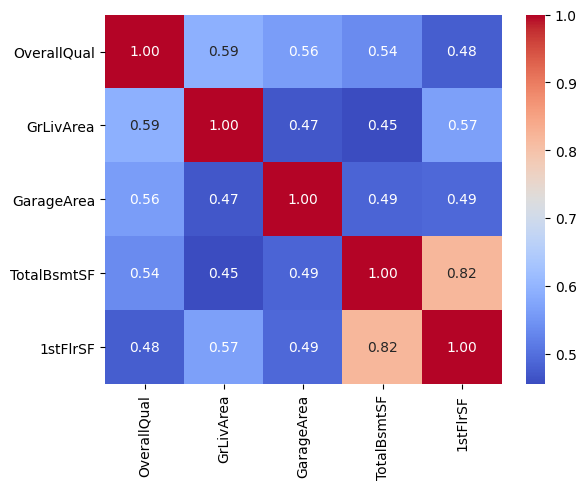

In [18]:
# List of top correlated variables
top_corr_vars = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

# Create correlation matrix for these variables
corr_matrix = records_df[top_corr_vars].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Given that 'TotalBsmtSF' (Total square feet of basement area) and '1stFlrSF' (First Floor square feet) are highly correlated, it suggests that they provide similar information. This is to be expected as houses with larger basements generally tend to have larger first floors. Using both of these variables in the analysis may not provide additional value and could potentially lead to multicollinearity issues in your model.

For this reason, I decide to combine them as I still retain the information from both variables without having the multicollinearity issue.

In [20]:
# Create new feature
records_df['TotalSF'] = records_df['TotalBsmtSF'] + records_df['1stFlrSF']

# Drop original features
records_df = records_df.drop(['TotalBsmtSF', '1stFlrSF'], axis=1)


Examine the distribution of 'TotalSF' and its relationship with 'SalePrice' using a histogram:

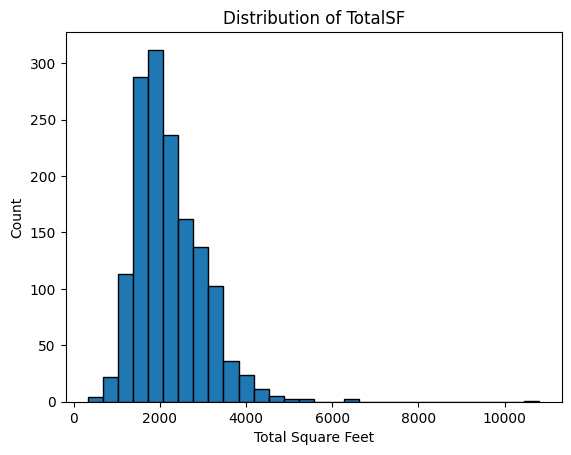

In [21]:
import matplotlib.pyplot as plt
plt.hist(records_df['TotalSF'], bins=30, edgecolor='black')
plt.title('Distribution of TotalSF')
plt.xlabel('Total Square Feet')
plt.ylabel('Count')
plt.show()

And the same with a scatterplot:

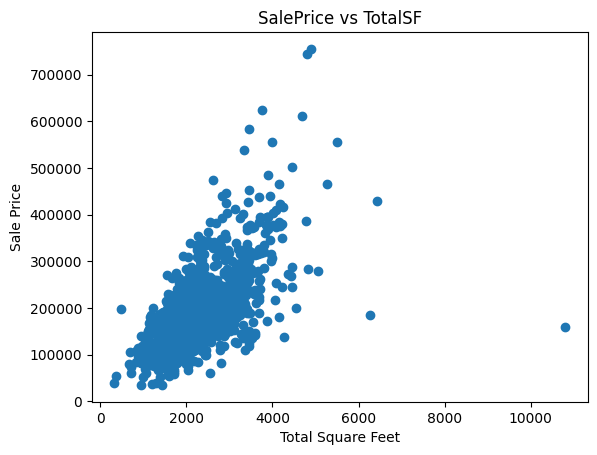

In [22]:
plt.scatter(records_df['TotalSF'], records_df['SalePrice'])
plt.title('SalePrice vs TotalSF')
plt.xlabel('Total Square Feet')
plt.ylabel('Sale Price')
plt.show()


NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
